# MSA 2024 Phase 2 - Part 1

## Sales Predictions for W Stores 

This report is for submission of MSA 2024 Phase 2 - Part 1: Analysis and Preprocessing.

Submission by Morgan Meertens

Import Libraries

In [172]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

## 1. Find all variables and understand them

Our context for the datasets provided is sales data and time information, including store information and store-related information. The task did not provide details regarding individual variables given in the files. So we first investigate their meanings. 


In [173]:
print('Store Information: ')
store_information = pd.read_csv("../W store sales/stores.csv")
display(store_information.head(10), 
         [str('Range of Store: '),(min(store_information["Store"]), max(store_information["Store"]))], 
         [str('Range of Size: '),(min(store_information["Size"]), max(store_information["Size"]))])
display(pd.DataFrame(store_information.dtypes, columns=['Type']).T)

print('Sales Information: ')
sales = pd.read_csv("../W store sales/sales.csv")
display(sales.head(10),
         [str('Range of Dept: '), (min(sales["Dept"]), max(sales["Dept"]))],
          [str('Range of Date: '),(min(sales["Date"]), max(sales["Date"]))])
display(pd.DataFrame(sales.dtypes, columns=['Type']).T)

print('Features Information: ')
features= pd.read_csv("../W store sales/features.csv")
display(features.head(10),
        features["MarkDown1"].tail(2),
        [str('Range of Unemployment: '),(min(features["Unemployment"]), max(features["Unemployment"]))])
display(pd.DataFrame(features.dtypes, columns=['Type']).T)

Store Information: 


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


['Range of Store: ', (1, 45)]

['Range of Size: ', (34875, 219622)]

,Store,Type,Size
Type,int64,object,int64


Sales Information: 


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


['Range of Dept: ', (1, 99)]

['Range of Date: ', ('2010-02-05', '2012-10-26')]

,Store,Dept,Date,Weekly_Sales,IsHoliday
Type,int64,int64,object,float64,bool


Features Information: 


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


8188    2961.49
8189     212.02
Name: MarkDown1, dtype: float64

['Range of Unemployment: ', (3.684, 14.313)]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Type,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool




There are three datasets:

Stores: 
- Store: *The store number. Range from 1-45.*
- Type: *The type of store. Categorised as 'A', 'B' or 'C'.*
- Size: *The size of the store. No information as to how this is determined, but based on the first few entries a guess would be the number of products stocked. This number is in the range 34,000 - 220,000.*


**The primary variable here is Store**.

Sales: 
- Store: *The store for which the observation is recorded for, 1-45.*
- Dept: *The department within a store. Range from 1-99.*
- Date: *The date of observation between 2010 and 2012.*
- Weekly_Sales: *The weekly sales amount recorded. No information about what is measured, based on the first few entires this is assumed to be a dollar amount ($).*
- IsHoliday: *A boolean value representing a holiday week or not.*


**The primary variables here are Store, Dept and Date**.

A number of assumptions related to the meaning of variables in the store-related features file were made. There are outlined below.

Features: 
- Store: *The store for which the observation is recorded for, 1-45.*
- Date: *The date of observation between 2010 and 2012.*
- Temperature: *Measured temperature in store region. Assumed to be the     average over the week. Based on a few entries this is likely measured in kelvin.*
- Fuel_Price: *Fuel prices in store region. Assumed to be an average over the week.* 	
- MarkDown1: *Represents a markdown of type 1. Assumed to be $ amount of total price reduction/discounts for the total weekly sales of observation.*
- MarkDown2: *Represents a markdown of type 2. Assumed to be $ amount of total price reduction/discounts for the total weekly sales of observation.*
- MarkDown3: *Represents a markdown of type 3. Assumed to be $ amount of total price reduction/discounts for the total weekly sales of observation.*
- MarkDown4: *Represents a markdown of type 4. Assumed to be $ amount of total price reduction/discounts for the total weekly sales of observation.*
- MarkDown5: *Represents a markdown of type 5. Assumed to be $ amount of total price reduction/discounts for the total weekly sales of observation.*
- CPI: *CPI would stand for the consumer price index. This is a measure of overall change in consumer prices.*
- Unemployment: *Assumed to be a rate of unemployment in the region. Ranges between 3%-14.5%.*
- IsHoliday: *A boolean value representing a holiday week or not.*


**The primary variables here are Store and Date**.


We see that in the sales dataset we are provided the number of weekly sales in dollar amounts for each department within a store. Each store is numerically catergorized along with departments. Dates of sale weeks are given. We can see this is given in dollar amounts due to the 2 dp accuracy. We are also provided an IsHoliday variable. Without more context this variable is vague. The features.csv and stores.csv files do not provide any more information. We have decided to assume this implies at least one day in the week was a holiday.

## 2. Clean data

We first merge our datasets and provide a statistical summary of the numeric variables provided. This merge will first be along our primary variable Store, and then Store, Date and IsHoliday. Doing so also provides a single dataset we can work with.

It can be seen the Date field is of type string. Further, the Date variable represents a weekly observation. Converting this field to datetime allows us to add week, month and year variables for any time series analysis.

In [174]:
features_store = features.merge(store_information, on="Store", how='inner')


# One helpful visualisation is timeseries plots, 
# a helpful addition to our data would be week, month and year variables.
# We can add these based on the Date column. 
# Converting date column to datetime 
features_store["Date"] = pd.to_datetime(features_store["Date"])
sales["Date"] = pd.to_datetime(sales["Date"])

# Adding some basic datetime features
features_store['Week'] = features_store['Date'].dt.isocalendar().week #cant figure out week calculation, dt.week is depreciated
features_store['Month'] = features_store['Date'].dt.month
features_store['Year'] = features_store['Date'].dt.year

sales_df = sales.merge(features_store, on = ["Store", "Date", "IsHoliday"]).sort_values(by=["Store","Dept","Date"])

display(sales_df.tail(3), sales_df.shape)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
421436,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,10,2012
421502,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,10,2012
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


(421570, 19)

The next step is to look for any missing values in our data.

In [175]:
# Look at null value count
display(sales_df.isnull().sum())

# Look at the percentages of null values
display(sales_df.isnull().sum()/len(sales_df))



Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Week                 0
Month                0
Year                 0
dtype: int64

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
Type            0.000000
Size            0.000000
Week            0.000000
Month           0.000000
Year            0.000000
dtype: float64

Each MarkDown variable contains missing values. In fact, over 60% of values in each column is missing. It is not clear what the variables mean. For now we keep these observations and decide what to do with them later. If these fields have no (or very little) correlation with Weekly_Sales we should be wary about dropping them as we would also loose other feature information.

##### Statistical summary of numeric variables in dataset

In [176]:

sales_df.describe().T.style.set_caption("Statistical Summary of numeric variables")

,count,mean,min,25%,50%,75%,max,std
Store,421570.000000,22.200546,1.000000,11.000000,22.000000,33.000000,45.000000,12.785297
Dept,421570.000000,44.260317,1.000000,18.000000,37.000000,74.000000,99.000000,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,nan
Weekly_Sales,421570.000000,15981.258123,-4988.940000,2079.650000,7612.030000,20205.852500,693099.360000,22711.183519
Temperature,421570.000000,60.090059,-2.060000,46.680000,62.090000,74.280000,100.140000,18.447931
Fuel_Price,421570.000000,3.361027,2.472000,2.933000,3.452000,3.738000,4.468000,0.458515
MarkDown1,150681.000000,7246.420196,0.270000,2240.270000,5347.450000,9210.900000,88646.760000,8291.221345
MarkDown2,111248.000000,3334.628621,-265.760000,41.600000,192.000000,1926.940000,104519.540000,9475.357325
MarkDown3,137091.000000,1439.421384,-29.100000,5.080000,24.600000,103.990000,141630.610000,9623.078290
MarkDown4,134967.000000,3383.168256,0.220000,504.220000,1481.310000,3595.040000,67474.850000,6292.384031


## 3. Visualise data

#### Sales per store and department

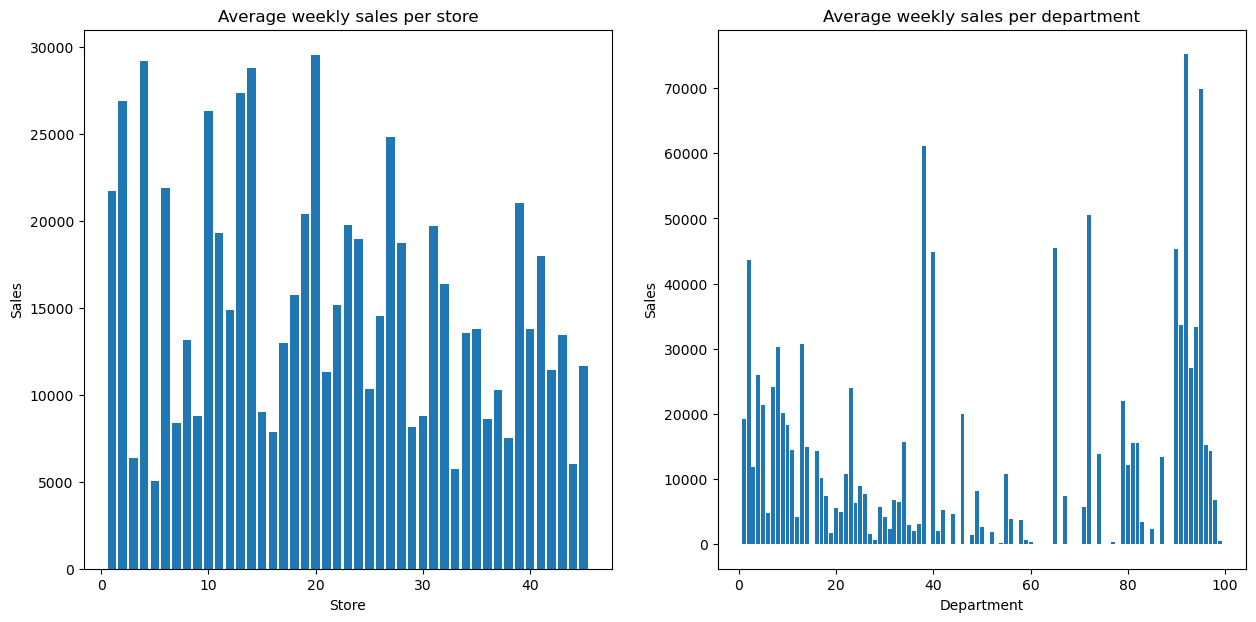

In [177]:
weekly_sales_store = sales_df["Weekly_Sales"].groupby(sales_df["Store"]).mean()
weekly_sales_dept = sales_df["Weekly_Sales"].groupby(sales_df["Dept"]).mean()

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(weekly_sales_store.index, weekly_sales_store.values)
plt.title('Average weekly sales per store')
plt.xlabel('Store')
plt.ylabel('Sales')

plt.subplot(1,2,2)
plt.bar(weekly_sales_dept.index, weekly_sales_dept.values)
plt.title('Average weekly sales per department')
plt.xlabel('Department')
plt.ylabel('Sales')

plt.subplots_adjust(hspace=2)


We observe a large difference in weekly sales accross stores, and also departments. Some departments seem to not have recorded data either.

#### Analysis of Store type

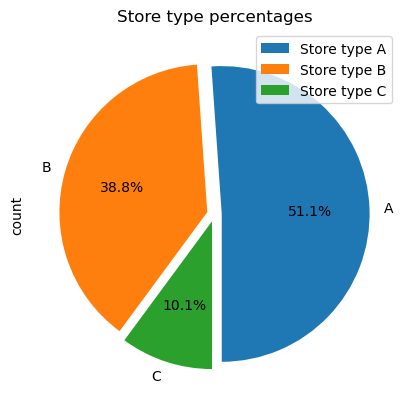

In [178]:
store_type_counts = sales_df["Type"].value_counts(dropna=False)
fig = store_type_counts.plot.pie(y='store type count', 
                                      title="Store type percentages",
                                      legend=True,
                                      autopct='%1.1f%%',
                                      explode=(0.05, 0.05, 0.05),
                                      startangle=-90)
fig.legend(['Store type A', 'Store type B', 'Store type C'], loc='upper right')

The stores are categorized into three types. From our graph above we see majority is of type A. We then look at what impact does store type have on the weekly sales and what size each type has.

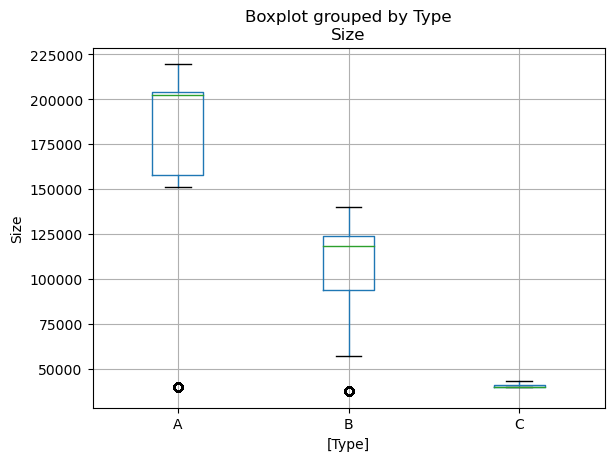

In [179]:
store_type_size = pd.concat([sales_df["Type"], sales_df["Size"]], axis=1)
# fig = store_type_size.boxplot(by='Type')

# calculate the 0.01th percentile
q01 = store_type_size["Size"].quantile(0.01)
# Get the variable to examine
col = store_type_size[store_type_size["Size"]>q01]
fig = col.boxplot(by='Type', ylabel="Size")

We see that stores of type A are generally much larger in size.

Weekly_Sales
Type Store Date                    
A    1     2010-02-05    1643690.90
           2010-02-12    1641957.44
           2010-02-19    1611968.17
           2010-02-26    1409727.59
           2010-03-05    1554806.68

<Axes: title={'center': 'Weekly_Sales'}, xlabel='[Type]'>

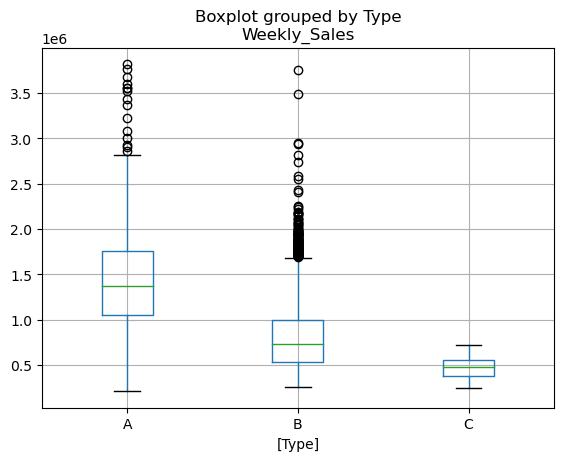

In [180]:
# plot of type against weekly sales
store_type_size = pd.DataFrame(sales_df.groupby(["Type","Store","Date"])["Weekly_Sales"].sum())
display(store_type_size.head())

store_type_size.boxplot(by='Type')

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

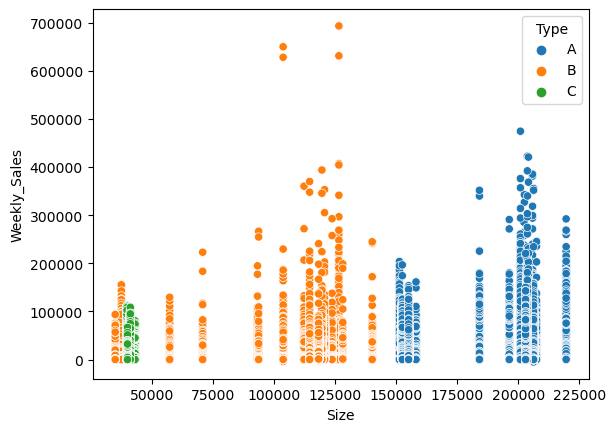

In [181]:
# plot size vs weekly sales separating by type
sns.scatterplot(data=sales_df,x='Size',y='Weekly_Sales',hue='Type')


On average, stores of type A have higher weekly sales, they are also generally of a larger size. 

#### Analysis of IsHoliday

The next thing to look at is analysis of the IsHoliday field and it's impact on Weekly_Sales. It is not clear what holidays are considered under this field, as well as how many days of the week for a week marked as True under the IsHoliday field were considered holiday days. 

This may be important as for weeks marked as True under IsHoliday,  stores could have a larger number of sales during some weeks than others, which may skew the observed effect and needs to be keep in mind when predicting future Weekly_Sales.

In [182]:
holiday_true = sales_df.loc[sales_df["IsHoliday"]==True].groupby(["Week", "Year", "Date"])["Weekly_Sales"].sum().reset_index()

holiday_true[["Week", "Year", "Date"]]

,Week,Year,Date
0,6,2010,2010-02-12
1,6,2011,2011-02-11
2,6,2012,2012-02-10
3,36,2010,2010-09-10
4,36,2011,2011-09-09
5,36,2012,2012-09-07
6,47,2010,2010-11-26
7,47,2011,2011-11-25
8,52,2010,2010-12-31
9,52,2011,2011-12-30


We see that each year holidays take place in weeks 6, 36, 47 and 52. Week 6 is in Feb, week 36 is in Sept, week 47 is Nov and week 52 is end Dec.

We were not given the country for which the data is for, however, because there is a holiday at the end of November it is likely not NZ based data as we do not have any significant holidays then. A bit of research does show however Thanksgiving, a US-based holiday does occur then although there is no certainty. Instead we consider the holiday weeks as Holiday1-4

Week 6 = Holiday1\
Week 36 = Holiday2\
Week 47 = Holiday3\
Week 52 = Holiday4 (Christmas/New year holidays)

We do not have sales data for Holiday3 and Holiday4 2012.

There are more holidays throughout the year that is not considered by the IsHoliday field, so we need to first check how this field effect Weekly_Sales.

Text(0, 0.5, 'Sales')

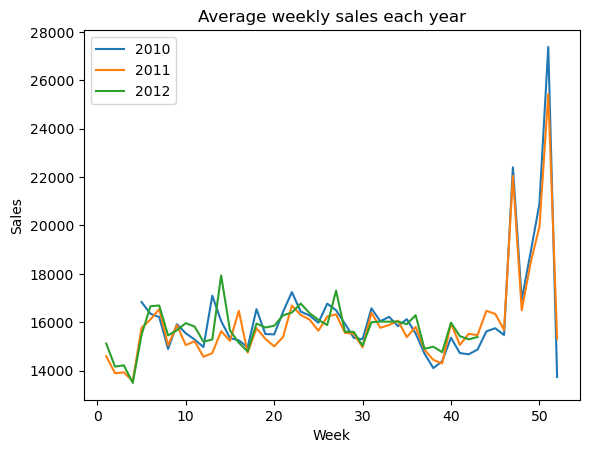

In [183]:
sales_2010 = sales_df[sales_df["Year"]==2010].groupby(["Week"])["Weekly_Sales"].mean()
sales_2011 = sales_df[sales_df["Year"]==2011].groupby(["Week"])["Weekly_Sales"].mean()
sales_2012 = sales_df[sales_df["Year"]==2012].groupby(["Week"])["Weekly_Sales"].mean()


plt.plot(sales_2010)
plt.plot(sales_2011)
plt.plot(sales_2012)
plt.legend(['2010','2011','2012'], loc='upper left')
plt.title('Average weekly sales each year')
plt.xlabel('Week')
plt.ylabel('Sales')


A massive spike in Weekly_Sales occurs near weeks corresponding to Holiday3 and Holiday4. This kind of increase is not seen around weeks for Holiday1 and Holiday2.

We also see a spike in sales around week 14/15 that is not considered a holiday week under the IsHoliday field. It does however correspond to Easter week. This could indicate that the IsHoliday field is not necessarily reliable or perhaps the field should be changed to True in the data for other known holidays. This analysis will not cover this, but serves as a possible way to improve the end result.

#### Analysis of Mark Down

Most observations have missing values for Mark down variables. Here we look at the effect mark down has on weekly sales to see if it can be dropped. 

In [184]:
# drop observations with missing mark down values
sales_df_dropNA = sales_df.dropna()
display(sales_df_dropNA.loc[:,["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].describe().T)

display(sales_df_dropNA.head())


,count,mean,std,min,25%,50%,75%,max
MarkDown1,97056.0,8841.260245,9258.091154,32.50,3600.79,6264.18,10333.24,88646.76
MarkDown2,97056.0,3693.532392,10058.901796,-265.76,47.55,192.00,2551.32,104519.54
MarkDown3,97056.0,1816.629491,10989.284083,-29.10,5.40,30.46,123.42,141630.61
MarkDown4,97056.0,4025.923108,7173.060535,0.46,605.88,1739.83,4082.99,67474.85
MarkDown5,97056.0,5310.830581,6535.397883,170.64,2383.67,3864.60,6197.53,108519.28


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
6587,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,45,11,2011
6659,1,1,2011-11-18,19050.66,False,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,A,151315,46,11,2011
6731,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,A,151315,47,11,2011
6804,1,1,2011-12-02,25293.49,False,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,A,151315,48,12,2011
6877,1,1,2011-12-09,33305.92,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,A,151315,49,12,2011


No MarkDown data is available for the year 2010 and no overall data for 2012 is given over the christmas period. We look at the total sales and markdown for all years combined.

Text(0, 0.5, 'Total')

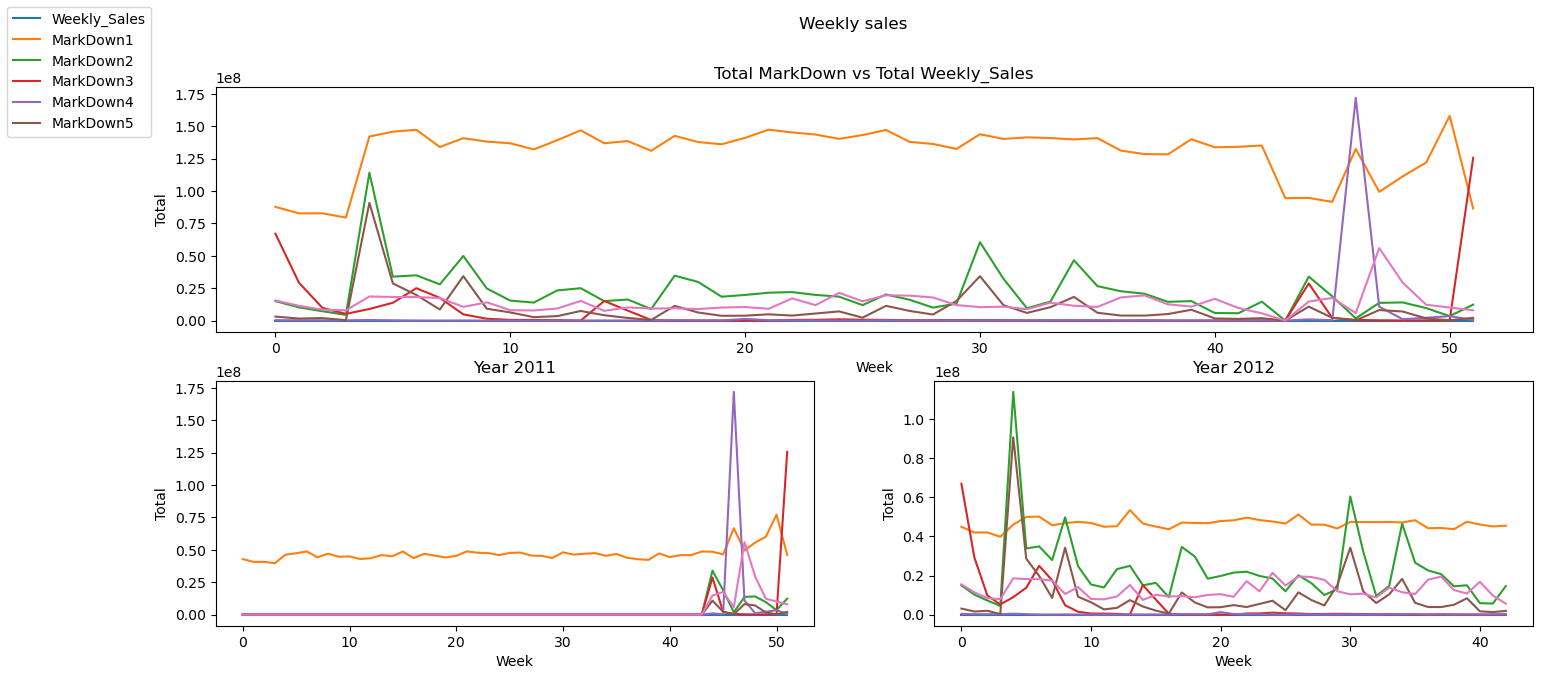

In [185]:
sales_MD = sales_df.groupby(["Week"])[["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].sum().reset_index(["Week"])
sales_MD_2011 = sales_df[sales_df["Year"]==2011].groupby(["Week"])[["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].sum().reset_index(["Week"])
sales_MD_2012 = sales_df[sales_df["Year"]==2012].groupby(["Week"])[["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].sum().reset_index(["Week"])

fig = plt.figure(figsize=(17,7))
fig.suptitle('Weekly sales')
ax1 = plt.subplot(211)
ax1.plot(sales_MD)
ax1.set_title('Total MarkDown vs Total Weekly_Sales')
ax1.set_xlabel('Week')
ax1.set_ylabel('Total')

ax2 = plt.subplot(223)
ax2.plot(sales_MD_2011)
ax2.set_title('Year 2011')
ax2.set_xlabel('Week')
ax2.set_ylabel('Total')


ax3 = plt.subplot(224)
ax3.plot(sales_MD_2012)
fig.legend(["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],loc=2)
ax3.set_title('Year 2012')
ax3.set_xlabel('Week')
ax3.set_ylabel('Total')



MarkDown is seen to play a role is boosting Weekly_Sales with peaks in MarkDown corresponding to an increase in Weekly_Sales. We do not neccessarily want to drop these variables, but we shall deal with this later. 

#### Analysis of other variables

Our goal is to predict weekly sales. We next need to understand how variables relate to sales. Our dataframe is very large, so for plotting/exploration purposes we take a random sample. A random sample of 15% provides observations.

In [186]:
sales_df_sample = sales_df.sample(frac=0.15, random_state=1)

In [187]:
# Function to plot variables separating IsHoliday
def box_bar_IsHol(dataset, col, col2, cat, catCon:bool, IsScatter:bool):
    col_sales = pd.concat([dataset[col], dataset[col2], dataset[cat]], axis=1)
    col_col2_nocat, col_col2_cat = [x for _, x in col_sales.groupby(col_sales[cat] == catCon)]

    
    fig, ax = plt.subplots(2,2, constrained_layout=True)  # boxplot 30% of the vertical space
    fig.suptitle(col)
    #Boxplot IsHoliday = False
    ax[0,0].boxplot(col_col2_nocat[col], vert=False)
    ax[0,0].set_title("IsHoliday = False")
    #Bar plot IsHoliday = False
    # ax[1,0].bar(x=col_col2_nocat[col], height=col_col2_nocat[col2])
    if IsScatter:
        ax[1,0].scatter(col_col2_nocat[col], col_col2_nocat[col2])
    else:
        ax[1,0].bar(x=col_col2_nocat[col], height=col_col2_nocat[col2])
    
    ax[1,0].title.set_size(0)
    ax[1,0].set_ylabel(col2)

    #Boxplot IsHoliday = True
    ax[0,1].boxplot(col_col2_cat[col], vert=False)
    ax[0,1].set_title("IsHoliday = True")
    #Bar plot IsHoliday = True
    if IsScatter:
        ax[1,1].scatter(col_col2_cat[col], col_col2_cat[col2])
    else:
        ax[1,1].bar(x=col_col2_cat[col], height=col_col2_cat[col2])
    
    ax[1,1].title.set_size(0)
    ax[1,1].set_ylabel(col2)


In [188]:
def show_density(var_data):
    fig = plt.figure(figsize=(7,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)


### Temperature

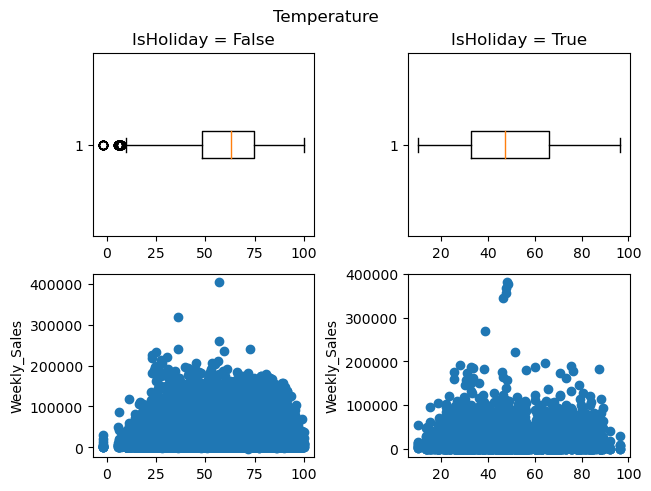

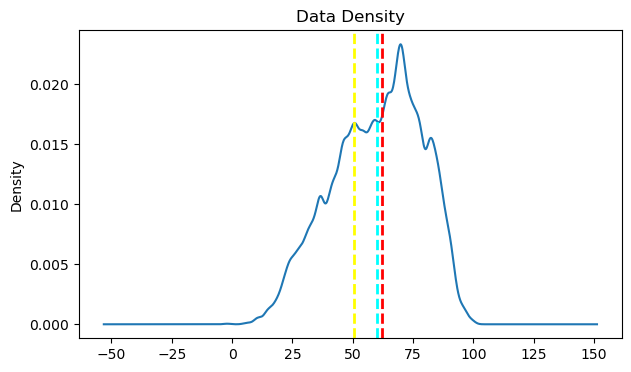

In [189]:

box_bar_IsHol(sales_df_sample, "Temperature", "Weekly_Sales", "IsHoliday", True, True)

show_density(sales_df["Temperature"])

Weekly_Sales do appear to be less at the extremes of temperature but overall no clear relationship is see between Temperature and Weekly_Sales.

### Fuel Prices

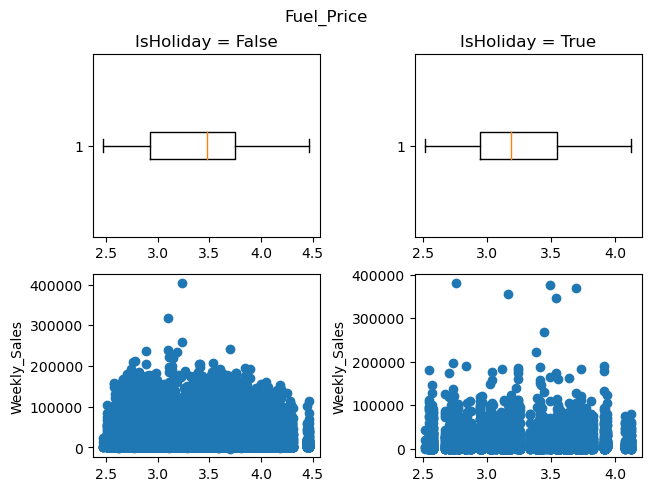

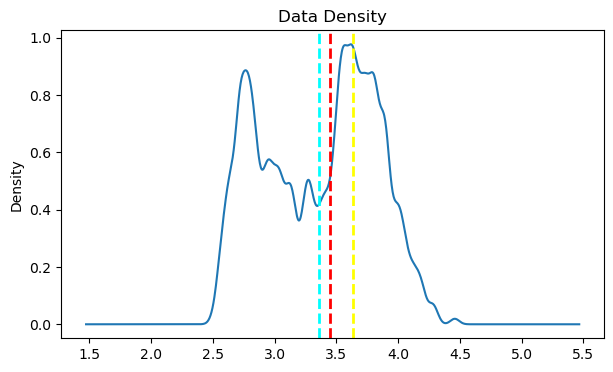

In [190]:
box_bar_IsHol(sales_df_sample, "Fuel_Price", "Weekly_Sales", "IsHoliday", True, True)
show_density(sales_df["Fuel_Price"])

There is not a clear relationship between Fuel_Price and Weekly_Sales either.

### Consumer Price Index (CPI)

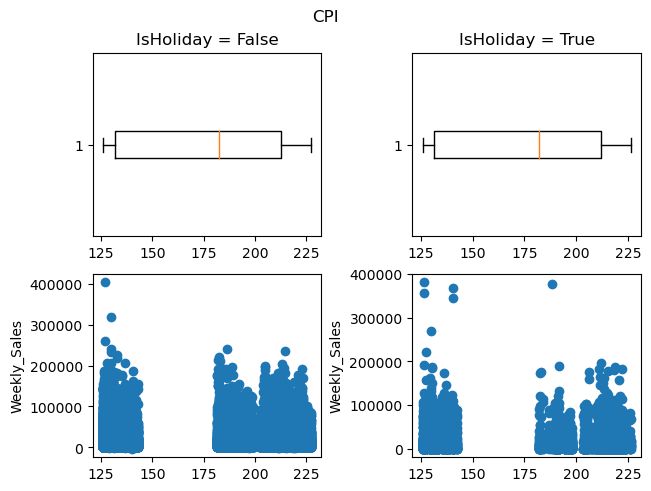

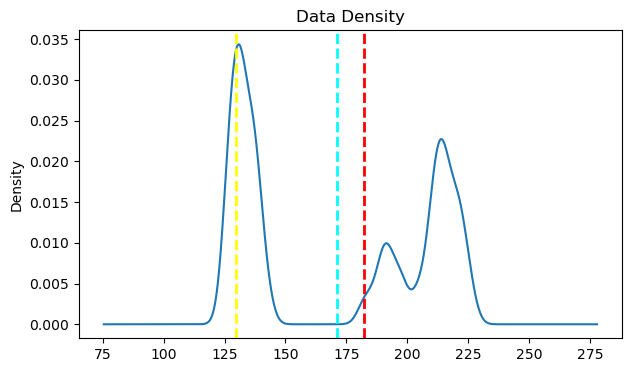

In [191]:
box_bar_IsHol(sales_df_sample, "CPI", "Weekly_Sales", "IsHoliday", True, True)
show_density(sales_df["CPI"])

We observe CPI data to be distributed bimodally, and no clear relationship can be seen to warrant further investigation.

### Unemployment

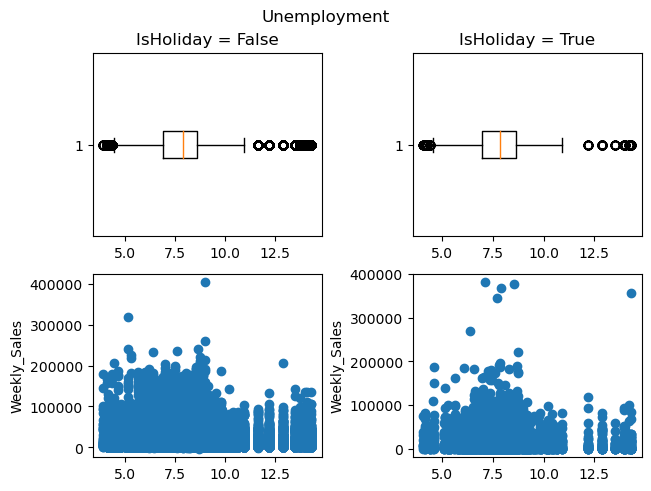

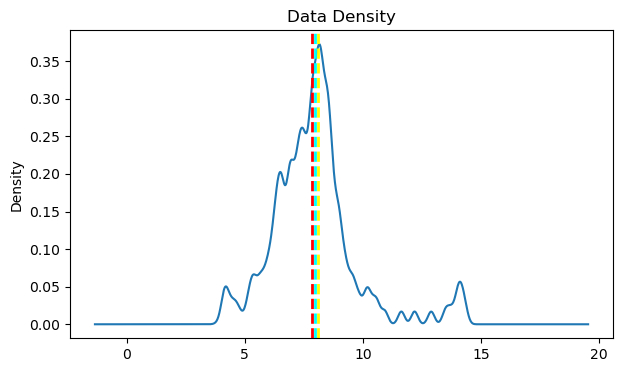

In [192]:
box_bar_IsHol(sales_df_sample, "Unemployment", "Weekly_Sales", "IsHoliday", True, True)
show_density(sales_df["Unemployment"])

No clear relationship is seen between Unemployment rate and Weekly_Sales either.

## 4. Identify correlated variables

### Encoding Categorical data
From our analysis above we observe the store type has an impact on Weekly_Sales. Further, IsHoliday appears to play a large role around the Christmas period. Here we encode a numerical value to these variables.


In [193]:
# encode Is_Holiday as 1 if True or 0 if False
sales_df["IsHoliday"] = sales_df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

# encode Type as 1 if A, 2 if B or 3 if C
sales_df["Type"] = sales_df["Type"].apply(lambda x: 1 if x=="A" else (2 if x=="B" else 3))

sales_df[["IsHoliday", "Type"]].head()

,IsHoliday,Type
0,0,1
73,1,1
145,0,1
218,0,1
290,0,1



### Correlation Matrix

In [194]:
corr_matrix = sales_df.drop(columns=["Date","Type"]).corr()
display(pd.DataFrame(sales_df.dtypes, columns=['Type']).T)

fig = plt.figure(figsize=(20,20), dpi = 480)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Correlation of each independent variable with the dependent variable
corr_matrix['Weekly_Sales'].sort_values(ascending=False)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
Type,int64,int64,datetime64[ns],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,UInt32,int32,int32


Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
Month           0.028409
Week            0.027673
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Year           -0.010111
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

From our correlation matrix we see that Size and Dept have a moderate positive correlation (compared to others) with weekly sales although considered weak still. 

MarkDown 1 to 5 does not have a strong correlation to Weekly_Sales and contain a lot of null values. We decide later what to do with these columns.

Fuel_Price has a strong correlation with Year and a very weak correlation with Weekly_Sales. We drop Fuel_Price.

Temperature, CPI and Unemployment also have a weak negative correlation following what we observed above. These can also be dropped.

Lastly we drop the Date, Month columns as Week and Year will be our main interest.


In [195]:
sales_df = sales_df.drop(columns=["Temperature"])
sales_df = sales_df.drop(columns=["CPI"])
sales_df = sales_df.drop(columns=["Unemployment"])
sales_df = sales_df.drop(columns=["Fuel_Price"])
sales_df = sales_df.drop(columns=["Date", "Month"])

## 6. Feature Engineering

We will create two dataframes to use in part 2. One will drop MarkDown 1 to 5, the other will replace the null values with an average.

In [196]:
data_sales = sales_df.copy()

We further encode spcific holidays as a way to deal with christmas sales being much higher than any week later.

In [197]:
data_sales['Holiday1'] = data_sales['Week'].apply(lambda x: 1 if x == 6 else 0)
data_sales['Holiday2'] = data_sales['Week'].apply(lambda x: 1 if x == 36 else 0)
data_sales['Holiday3'] = data_sales['Week'].apply(lambda x: 1 if x == 47 else 0)
data_sales['Holiday4'] = data_sales['Week'].apply(lambda x: 1 if x == 52 else 0)

The first dataframe dropping null values.

In [198]:
data_sales_noNulls = data_sales.copy()
data_sales_noNulls.dropna(inplace=True)
display(data_sales_noNulls.head())

data_sales_fill0 = data_sales.copy()
data_sales_fill0.fillna(0, inplace = True)
display(data_sales_fill0.head())

display(data_sales.head())

,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Week,Year,Holiday1,Holiday2,Holiday3,Holiday4
6587,1,1,18689.54,0,10382.90,6115.67,215.07,2406.62,6551.42,1,151315,45,2011,0,0,0,0
6659,1,1,19050.66,0,6074.12,254.39,51.98,427.39,5988.57,1,151315,46,2011,0,0,0,0
6731,1,1,20911.25,1,410.31,98.00,55805.51,8.00,554.92,1,151315,47,2011,0,0,1,0
6804,1,1,25293.49,0,5629.51,68.00,1398.11,2084.64,20475.32,1,151315,48,2011,0,0,0,0
6877,1,1,33305.92,0,4640.65,19.00,105.02,3639.42,14461.82,1,151315,49,2011,0,0,0,0


,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Week,Year,Holiday1,Holiday2,Holiday3,Holiday4
0,1,1,24924.50,0,0.0,0.0,0.0,0.0,0.0,1,151315,5,2010,0,0,0,0
73,1,1,46039.49,1,0.0,0.0,0.0,0.0,0.0,1,151315,6,2010,1,0,0,0
145,1,1,41595.55,0,0.0,0.0,0.0,0.0,0.0,1,151315,7,2010,0,0,0,0
218,1,1,19403.54,0,0.0,0.0,0.0,0.0,0.0,1,151315,8,2010,0,0,0,0
290,1,1,21827.90,0,0.0,0.0,0.0,0.0,0.0,1,151315,9,2010,0,0,0,0


,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Week,Year,Holiday1,Holiday2,Holiday3,Holiday4
0,1,1,24924.50,0,NaN,NaN,NaN,NaN,NaN,1,151315,5,2010,0,0,0,0
73,1,1,46039.49,1,NaN,NaN,NaN,NaN,NaN,1,151315,6,2010,1,0,0,0
145,1,1,41595.55,0,NaN,NaN,NaN,NaN,NaN,1,151315,7,2010,0,0,0,0
218,1,1,19403.54,0,NaN,NaN,NaN,NaN,NaN,1,151315,8,2010,0,0,0,0
290,1,1,21827.90,0,NaN,NaN,NaN,NaN,NaN,1,151315,9,2010,0,0,0,0


Our second dataframe dealing with missing MarkDown values is replacing them with an average over each week.

In [199]:
sales_MD_avs = sales_df.groupby(["Week"])[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].mean().reset_index(["Week"])

data_sales_avMD= data_sales.copy()
display(("Before: ", data_sales_avMD.head(10)))
for i in range(52):
    for col in {"MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"}:
        data_sales_avMD.loc[data_sales_avMD["Week"]==i+1, col]=data_sales_avMD.loc[data_sales_avMD["Week"]==i+1, col].fillna(sales_MD_avs.loc[sales_MD["Week"]==i+1][col].item())

display(("After: ", data_sales_avMD.head(10)))

('Before: ',
      Store  Dept  Weekly_Sales  IsHoliday  MarkDown1  MarkDown2  MarkDown3  \
 0        1     1      24924.50          0        NaN        NaN        NaN   
 73       1     1      46039.49          1        NaN        NaN        NaN   
 145      1     1      41595.55          0        NaN        NaN        NaN   
 218      1     1      19403.54          0        NaN        NaN        NaN   
 290      1     1      21827.90          0        NaN        NaN        NaN   
 363      1     1      21043.39          0        NaN        NaN        NaN   
 436      1     1      22136.64          0        NaN        NaN        NaN   
 508      1     1      26229.21          0        NaN        NaN        NaN   
 580      1     1      57258.43          0        NaN        NaN        NaN   
 652      1     1      42960.91          0        NaN        NaN        NaN   
 
      MarkDown4  MarkDown5  Type    Size  Week  Year  Holiday1  Holiday2  \
 0          NaN        NaN     1  151315

('After: ',
      Store  Dept  Weekly_Sales  IsHoliday     MarkDown1    MarkDown2  \
 0        1     1      24924.50          0  38318.227017  3001.690739   
 73       1     1      46039.49          1  11289.908414  4655.914020   
 145      1     1      41595.55          0  11612.304809  8299.497699   
 218      1     1      19403.54          0   9435.308801  5928.290868   
 290      1     1      21827.90          0  16660.722836  1632.446612   
 363      1     1      21043.39          0   8333.259129   491.625601   
 436      1     1      22136.64          0   5195.253681   189.427509   
 508      1     1      26229.21          0   4771.316406   189.658534   
 580      1     1      57258.43          0   7857.220213   124.778108   
 652      1     1      42960.91          0   8367.194241   136.355209   
 
       MarkDown3     MarkDown4    MarkDown5  Type    Size  Week  Year  \
 0    150.672909  31502.484083  6241.230860     1  151315     5  2010   
 73    74.340210  10809.849714  6060.

#### Save output to csv


In [200]:
from pathlib import Path  
filepath = Path('./output/data_sales_noNulls.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_sales_noNulls.to_csv(filepath) 

filepath = Path('./output/data_sales_fill0.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_sales_fill0.to_csv(filepath) 


filepath = Path('./output/data_sales_avMD.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_sales_avMD.to_csv(filepath) 

## 5. Summary

Our exploration of the sales data set and visualisation of the different features show that only a few features influence the weekly sales variable, namely Size, Deptmartment and Type. The features Temperature, CPI, Unemployment and Fuel_Price did not have a visible influence on Weekly_Sales and could be dropped. The IsHoliday feature, although only 4 weeks of the year, could be seen to boost sales, especially around the end of each year.

The variables MarkDown 1 to 5 showed a weak correalation with weekly sales, however over 60% of data was missing and we may not be seeing the full picture. To handle these missing values three new dataframe were prepared. One in which null values were dropped completely, however in doing so valuable information of other variables could have been lost. A second one in which the null values were filled with zeros, and the third replaced the null values with an average over the weeks to capture what it might have been.

Each dataframe was saved to a csv file to be imported into part 2.